# Team 1 - CAP5619 Project
#### Marco Bogani, Sulaiman Karmali, Daman Sawhney, Ivan Lima

## Define the problem:

Considering the economic climate from 2022 to today, one of the most apparent changes that took place was car prices and sales. Dealerships continuously face the challenges, of optimizing sales strategies to cater to a multitude of diverse demographics and preferences. Our study aims to leverage our car sales dataset to predict future car sales trends, partition customers based on their purchase behavior, and determine the best pricing strategy for different car models. By applying regression models for sales forecasting, clustering techniques for customer segmentation, and machine learning algorithms for price optimization, this analysis aims to discover patterns and insights that can inform targeted marketing campaigns and efficient inventory management. Thus the overall goal is to enable dealerships to better understand their customers' preferences, better adjust to market climate changes, and ultimately improve both sales performance and customer satisfaction. Moreover, this comprehensive approach will let dealerships gain a competitive edge in the car market by making data-driven decisions that align with customer trends and expectations. 

## Load Libraries:

In [340]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import MultinomialNB

## Load Dataset:

In [341]:
# Load the data
## Change file path to where you have dataset saved

df = pd.read_csv(r"C:\Users\Setup User\Documents\GitHub\CAPcourse\CAPcourse\datasets\carSales.csv")
df.columns
df = df.drop(columns=['Customer Name','Dealer_Name','Phone','Company','Dealer_No ','Car_id','Dealer_Region'])
df.head(5)

,Date,Gender,Annual Income,Model,Engine,Transmission,Color,Price ($),Body Style
0,1/2/2022,Male,13500,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV
1,1/2/2022,Male,1480000,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV
2,1/2/2022,Male,1035000,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger
3,1/2/2022,Male,13500,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV
4,1/2/2022,Male,1465000,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback


## Summarize Data:

The dataset being worked with is clean when it comes to NaN and NULL values as shown below.

In [342]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# check for na or Null values
isnacount = df.isna().sum()
isnullcount = df.isnull().sum()

# print results
print("DataFrame data types: \n", df.dtypes)
print("NA data counts: \n", isnacount)
print("\nNULL data counts: \n", isnullcount)

DataFrame data types: 
 Date             datetime64[ns]
Gender                   object
Annual Income             int64
Model                    object
Engine                   object
Transmission             object
Color                    object
Price ($)                 int64
Body Style               object
dtype: object
NA data counts: 
 Date             0
Gender           0
Annual Income    0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
dtype: int64

NULL data counts: 
 Date             0
Gender           0
Annual Income    0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
dtype: int64


This shape can help understand the complexity of the dataset. It is important to remember the number of columns here as they will change when encoding occurs.

In [343]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 23906
Number of columns: 9


Below, column info can be gathered. This is to better understand what data we are working with. This will also prepare us for feature selection.+

In [344]:
# Setup column name variable and empty dictionary
columns = ['Body Style','Model', 'Engine', 'Color'] 
unique_values_dict = {}

for column in columns:
    unique_values_dict[column] = df[column].unique().tolist()

# Print the unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"{column}: {unique_values}")

Body Style: ['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan']
Model: ['Expedition', 'Durango', 'Eldorado', 'Celica', 'TL', 'Diamante', 'Corolla', 'Galant', 'Malibu', 'Escort', 'RL', 'Pathfinder', 'Grand Marquis', '323i', 'Sebring Coupe', 'Forester', 'Accent', 'Land Cruiser', 'Accord', '4Runner', 'I30', 'A4', 'Carrera Cabrio', 'Jetta', 'Viper', 'Regal', 'LHS', 'LW', '3000GT', 'SLK230', 'Civic', 'S-Type', 'S40', 'Mountaineer', 'Park Avenue', 'Montero Sport', 'Sentra', 'S80', 'Lumina', 'Bonneville', 'C-Class', 'Altima', 'DeVille', 'Stratus', 'Cougar', 'SW', 'C70', 'SLK', 'Tacoma', 'M-Class', 'A6', 'Intrepid', 'Sienna', 'Eclipse', 'Contour', 'Town car', 'Focus', 'Mustang', 'Cutlass', 'Corvette', 'Impala', 'Cabrio', 'Dakota', '300M', '328i', 'Bravada', 'Maxima', 'Ram Pickup', 'Concorde', 'V70', 'Quest', 'ES300', 'SL-Class', 'Explorer', 'Prizm', 'Camaro', 'Outback', 'Taurus', 'Cavalier', 'GS400', 'Monte Carlo', 'Sonata', 'Sable', 'Metro', 'Voyager', 'Cirrus', 'Avenger', 'Odyssey', 'Intri

Above, it can be seen that the Engine column has a corrupted character and that there are no similar features like 'light blue' or 'dark blue.'

In [345]:
# Change just the engine column to correct typo
df['Engine'] = df['Engine'].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft')


Below is a complete verification of columns and their unique value syntax validation.

In [346]:
# Setup column name variable and empty dictionary
columns = ['Body Style','Engine', 'Color','Transmission','Gender','Price ($)','Model']  # replace with your actual column names
unique_values_dict = {}

for column in columns:
    unique_values_dict[column] = df[column].unique().tolist()

# Print the unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"{column}: {unique_values}")

Body Style: ['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan']
Engine: ['Double Overhead Camshaft', 'Overhead Camshaft']
Color: ['Black', 'Red', 'Pale White']
Transmission: ['Auto', 'Manual']
Gender: ['Male', 'Female']
Price ($): [26000, 19000, 31500, 14000, 24500, 12000, 42000, 82000, 15000, 31000, 46000, 9000, 17000, 18000, 33000, 21000, 25000, 22000, 31250, 41000, 13000, 20000, 43000, 16000, 61000, 39000, 42500, 45001, 36001, 21001, 29000, 27000, 25600, 36000, 31100, 22600, 45000, 62000, 22700, 49000, 28000, 22001, 25001, 12800, 22500, 46500, 54000, 16001, 38000, 21200, 71000, 57001, 62001, 69001, 20001, 26750, 24000, 28501, 15500, 12500, 27250, 11000, 26500, 69000, 14150, 60500, 44000, 11650, 11800, 27500, 16900, 14200, 51000, 32000, 39500, 13500, 9250, 29500, 18501, 17001, 23500, 53000, 60750, 24001, 35000, 18500, 21500, 41100, 20200, 59000, 57000, 25500, 19100, 10000, 23000, 11501, 24250, 37000, 54500, 25100, 34000, 21900, 29200, 85000, 43500, 14500, 16500, 85600, 75000, 71500

## Descriptive Statistics & Data Visualizations:

At this point, only Annual Income and Price are the numerical columns in the dataframe. We can see their quartiles, minimum and maximum values, etc.

In [347]:
dfdesc = df.describe()
dfdesc.round(2)

,Date,Annual Income,Price ($)
count,23906,23906.00,23906.00
mean,2023-03-01 14:28:10.822387456,830840.29,28090.25
min,2022-01-02 00:00:00,10080.00,1200.00
25%,2022-09-20 00:00:00,386000.00,18001.00
50%,2023-03-13 00:00:00,735000.00,23000.00
75%,2023-09-08 00:00:00,1175750.00,34000.00
max,2023-12-31 00:00:00,11200000.00,85800.00
std,NaN,720006.40,14788.69


To better understand underlying correlations which will help us better build the prediction model, we must remove outlier data. In the visualizations below, you can see how removing outliers makes the data more legible and the smaller differences in class trends can be observed.

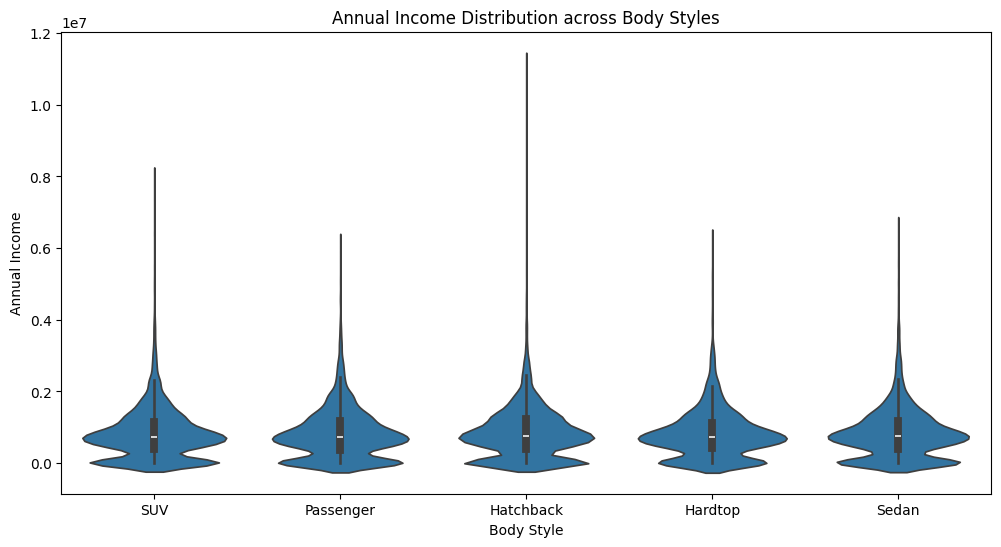

In [348]:
# Visualize with basic dataframe without any preprocessing
plt.figure(figsize=(12, 6))
sns.violinplot(x='Body Style', y='Annual Income', data=df)
plt.title('Annual Income Distribution across Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Annual Income')
plt.show()

Only Annual Income was refined for outliers as that data is primary value that can be uncorrelated to the price of a purchased vehice.

In [349]:
# Calculate the Inter Quartile Range for Annual Income
Q1 = df['Annual Income'].quantile(0.25)
Q3 = df['Annual Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the cutoff for outliers
cutoff = IQR * 1.5

# Determine the bounds for the outliers
lower_bound = Q1 - cutoff
upper_bound = Q3 + cutoff

df_outliers = df[(df['Annual Income'] < lower_bound) | (df['Annual Income'] > upper_bound)]

# Print the outliers
print("Annual Income class outliers:\n", df_outliers['Annual Income'].head(5))

# Filter the dataframe to remove outliers from 'Annual Income'
df = df[(df['Annual Income'] >= lower_bound) & (df['Annual Income'] <= upper_bound)]

# Check if any values in the filtered DataFrame fall outside the bounds
outliers_present = any((df['Annual Income'] < lower_bound) | (df['Annual Income'] > upper_bound))

# Print result and confirm process complete.
if outliers_present:
    print("Outliers were not removed correctly.")
else:
    print("Outliers were removed correctly.")

Annual Income class outliers:
 21     2500000
48     4060000
89     2550000
122    3000000
125    2800000
Name: Annual Income, dtype: int64
Outliers were removed correctly.


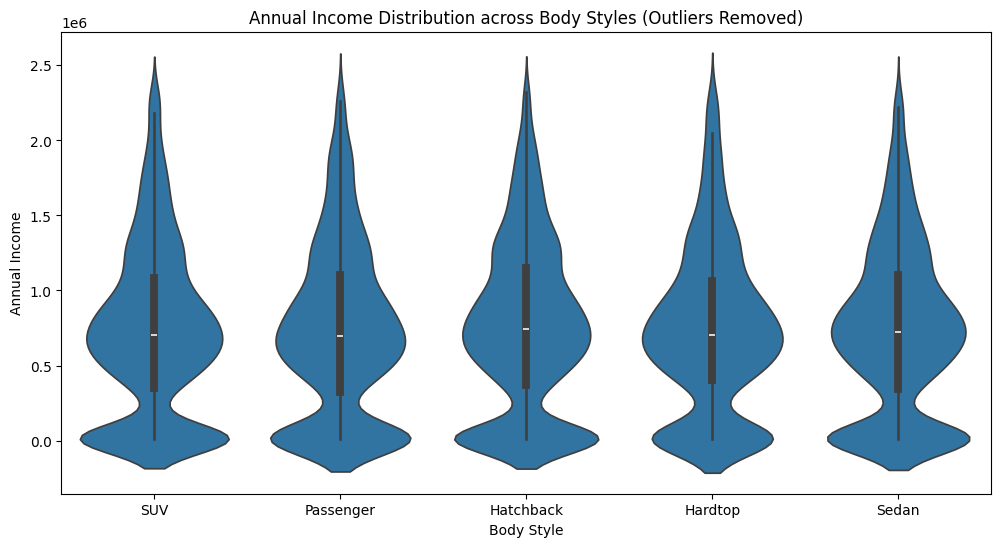

In [350]:
# Now visualized the data without outliers
plt.figure(figsize=(12, 6))
sns.violinplot(x='Body Style', y='Annual Income', data=df)
plt.title('Annual Income Distribution across Body Styles (Outliers Removed)')
plt.xlabel('Body Style')
plt.ylabel('Annual Income')
plt.show()

In this particular context, since the pinching occurs at a similar income level across all body styles, it could indicate a common income value around which fewer people purchase cars, regardless of the body style. This might suggest a market segment that is underserved or has fewer customers.

## Clean & Prepare Data:

Since the dataset ranges over 2 years, the significant trends in an established industry are not intense. As such, it is decided removing date from the data would not have a meaningful impact to the model's performance.

Model was the only class with many features and was label encoded instead to keep our dataset from getting too large.

In [351]:
remappeddf = df.copy()
remappeddf.drop(columns=['Date'], inplace=True)

# Setup the label encoder
le = LabelEncoder()

# Fit and transform the 'Model' column
remappeddf['Model'] = le.fit_transform(remappeddf['Model'])

print(remappeddf.head(5))

  Gender  Annual Income  Model                    Engine Transmission  \
0   Male          13500     60  Double Overhead Camshaft         Auto   
1   Male        1480000     52  Double Overhead Camshaft         Auto   
2   Male        1035000     57         Overhead Camshaft       Manual   
3   Male          13500     36         Overhead Camshaft       Manual   
4   Male        1465000    141  Double Overhead Camshaft         Auto   

        Color  Price ($) Body Style  
0       Black      26000        SUV  
1       Black      19000        SUV  
2         Red      31500  Passenger  
3  Pale White      14000        SUV  
4         Red      24500  Hatchback  


## Feature Selection and Data Transformations

Features above have a few classes except Price and model. One Hot encoding will be good for the features which are not Price and Model. For the Model class, a label encoder is used due to the large amount of models. MixMax scaling was applied to Annual income and Price ($) data to make it more normalized.

In [352]:
le = LabelEncoder()

# Fit and transform the 'Model' column
remappeddf['Model'] = le.fit_transform(remappeddf['Model'])


categorical_columns = ['Body Style', 'Engine', 'Color', 'Transmission', 'Gender']  # Categorical columns
# Keeping only the categorical columns for encoding
remappeddf_categorical = remappeddf[categorical_columns]

encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(remappeddf_categorical).toarray()
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded DataFrame with the rest of the data and exlude the original categorical columns for redundancy sake
df_rest = remappeddf.drop(columns=categorical_columns)
df_combined = pd.concat([df_rest, df_encoded], axis=1)

# Print preview of the combined DataFrame
print(df_combined.head())  

   Annual Income  Model  Price ($)  Body Style_Hardtop  Body Style_Hatchback  \
0        13500.0   60.0    26000.0                 0.0                   0.0   
1      1480000.0   52.0    19000.0                 0.0                   0.0   
2      1035000.0   57.0    31500.0                 0.0                   0.0   
3        13500.0   36.0    14000.0                 0.0                   0.0   
4      1465000.0  141.0    24500.0                 0.0                   1.0   

   Body Style_Passenger  Body Style_SUV  Body Style_Sedan  \
0                   0.0             1.0               0.0   
1                   0.0             1.0               0.0   
2                   1.0             0.0               0.0   
3                   0.0             1.0               0.0   
4                   0.0             0.0               0.0   

   Engine_Double Overhead Camshaft  Engine_Overhead Camshaft  Color_Black  \
0                              1.0                       0.0          1.0  

Below, you can see the number of rows has decreased from data cleaning and the number of columns has increased due to encoding.

In [353]:
# Get the number of rows and columns
num_rows, num_columns = df_combined.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Post processing statistics of the dataset/ dataframe 
print("\nRemapped DataFrame: \n\n", df_combined.describe().round(3))  # This will give you count, mean, std, min, 25%, 50%, 75%, max
print('\nVariance values: \n\n', df_combined.var().astype('Float32'))  # Variance
print('\nSkew measurement: \n\n',df_combined.skew().round(4))  # Skewness

Number of rows: 23886
Number of columns: 17

Remapped DataFrame: 

        Annual Income      Model  Price ($)  Body Style_Hardtop  \
count      23090.000  23090.000  23090.000           23090.000   
mean      749642.246     77.920  28056.275               0.125   
std       563609.761     43.985  14772.941               0.330   
min        10080.000      0.000   1200.000               0.000   
25%       360000.000     42.000  18001.000               0.000   
50%       715000.000     81.000  23000.000               0.000   
75%      1100000.000    115.000  34000.000               0.000   
max      2360000.000    153.000  85800.000               1.000   

       Body Style_Hatchback  Body Style_Passenger  Body Style_SUV  \
count             23090.000             23090.000       23090.000   
mean                  0.256                 0.165           0.267   
std                   0.436                 0.371           0.442   
min                   0.000                 0.000           0

MinMaxScaler was chosen for Annual Income and Price because the rest of the dataset is so ingrained with binary data, have a normalized range between 0 and 1 for these classes worked well.

In [354]:
na_count = df_combined['Annual Income'].isna().sum()
print(na_count)

df_combined = df_combined.dropna()

796


In [355]:

# Setup the scalar
scaler = MinMaxScaler()

# Select the columns to be normalized
columns_to_normalize = ['Annual Income','Price ($)']  # Replace with your actual column names

# Normalize the selected columns
df_normalized = df_combined.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Print the normalized dataframe
print(df_normalized.head())


   Annual Income  Model  Price ($)  Body Style_Hardtop  Body Style_Hatchback  \
0       0.000000   60.0   0.293144                 0.0                   0.0   
1       0.624973   52.0   0.210402                 0.0                   0.0   
2       0.435329   57.0   0.358156                 0.0                   0.0   
3       0.000000   36.0   0.151300                 0.0                   0.0   
4       0.618581  141.0   0.275414                 0.0                   1.0   

   Body Style_Passenger  Body Style_SUV  Body Style_Sedan  \
0                   0.0             1.0               0.0   
1                   0.0             1.0               0.0   
2                   1.0             0.0               0.0   
3                   0.0             1.0               0.0   
4                   0.0             0.0               0.0   

   Engine_Double Overhead Camshaft  Engine_Overhead Camshaft  Color_Black  \
0                              1.0                       0.0          1.0  

Below, the dataset's Gender_Male feature is undersampled so that there is a normal distribution of males & females in the dataset.

In [356]:
print("Before sampling: \n", df_normalized.Gender_Male.value_counts())

# Separate majority and minority classes
df_majority = df_normalized[df_normalized.Gender_Male==1]
df_minority = df_normalized[df_normalized.Gender_Male==0]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print("\nAfter sampling: \n",df_downsampled.Gender_Male.value_counts())
print(df_downsampled.head(2))

nan_count = df_downsampled.isnull().sum().sum()
print("\nNumber of NaN occurrences in df_downsampled:", nan_count)


Before sampling: 
 Gender_Male
1.0    17485
0.0     4809
Name: count, dtype: int64

After sampling: 
 Gender_Male
1.0    4809
0.0    4809
Name: count, dtype: int64
       Annual Income  Model  Price ($)  Body Style_Hardtop  \
10034       0.656936   74.0   0.180851                 0.0   
21402       0.000000   42.0   0.482281                 1.0   

       Body Style_Hatchback  Body Style_Passenger  Body Style_SUV  \
10034                   0.0                   0.0             1.0   
21402                   0.0                   0.0             0.0   

       Body Style_Sedan  Engine_Double Overhead Camshaft  \
10034               0.0                              0.0   
21402               0.0                              0.0   

       Engine_Overhead Camshaft  Color_Black  Color_Pale White  Color_Red  \
10034                       1.0          1.0               0.0        0.0   
21402                       1.0          0.0               1.0        0.0   

       Transmission_Auto  Tr

In [357]:
# Set up the X and y variables
X = df_downsampled.drop(columns=['Engine_Double Overhead Camshaft'])  # Replace with the actual columns for X
y = df_downsampled['Engine_Double Overhead Camshaft']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [358]:
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

df_downsampled['Annual Income'] = df_downsampled['Annual Income'].astype(int)

Length of X_test: 1924
Length of y_test: 1924


# March 15th work:

In [359]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

model = LogisticRegression()
# model = MultinomialNB()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Length of y_pred: {len(y_pred)}")

Length of y_pred: 1924


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC: 1.0


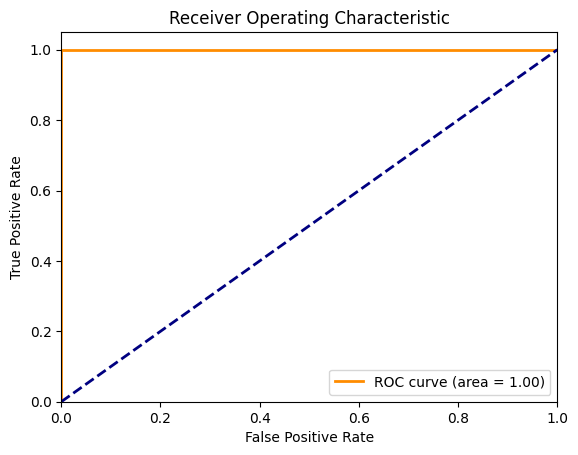

In [362]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

# AUC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()